## Importing Data and making Dataframe

In [696]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import linear_model

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train2 = train.copy()

train2 = train2.drop('Id',axis=1)

In [697]:
print(train2.keys())
train2.shape

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

(1460, 80)

## Identifying NAs

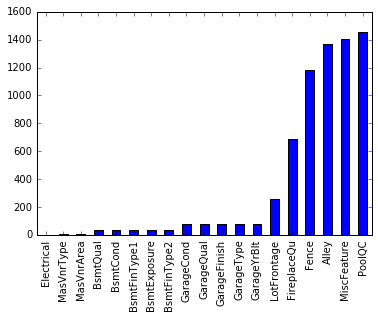

In [648]:
%matplotlib inline

missing = train2.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [649]:
train2["SaleType"].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'], dtype=object)

In [650]:
quant = [f for f in train2.columns if train2.dtypes[f] != 'object']
#qual = [f for f in train2.columns if train2.dtypes[f] == 'object']

train2[quant]
train2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [673]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
## fit your linear model with fit() function
ols.fit(train2[['SalePrice']], train2['LotArea'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [698]:
train2.isnull().sum().sort_values(ascending=False)
missing[missing>0] 

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

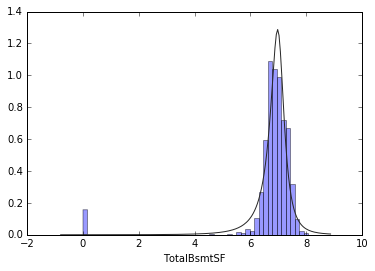

In [674]:
histlot = train2[train2['LotFrontage'].notnull()]
sns.distplot(dummy_train.TotalBsmtSF, kde=False, fit=st.johnsonsu)

In [675]:
train2[train2['LotFrontage'].notnull()].LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

## Cleaning and munging Data

In [699]:
train2['PoolQC'].fillna('No Pool',inplace = True)
train2['MiscFeature'].fillna('None',inplace = True)
train2['Alley'].fillna('No Alley Access',inplace = True)
train2['Fence'].fillna('No Fence',inplace = True)
train2['FireplaceQu'].fillna('No Fireplace',inplace = True)
train2['LotFrontage'] = train2['LotFrontage'].fillna(train2.groupby(['Neighborhood'])['LotFrontage'].transform('mean').round())
train2['GarageYrBlt'].fillna('No Garage',inplace = True)
train2['GarageType'].fillna('No Garage',inplace = True)
train2['GarageFinish'].fillna('No Garage',inplace = True)
train2['GarageQual'].fillna('No Garage',inplace = True)
train2['GarageCond'].fillna('No Garage',inplace = True)
train2['BsmtFinType2'].fillna('No Garage',inplace = True)
train2['BsmtExposure'].fillna('No Garage',inplace = True)
train2['BsmtFinType1'].fillna('No Garage',inplace = True)
train2['BsmtCond'].fillna('No Garage',inplace = True)
train2['BsmtQual'].fillna('No Garage',inplace = True)
train2['MasVnrArea'].fillna(0,inplace = True)
train2['MasVnrType'].fillna('None',inplace = True)
train2['Electrical'].fillna('SBrkr', inplace = True)

In [700]:
#stats.skew(train2[quant])
train2.skew()

MSSubClass        1.407657
LotFrontage       2.165893
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
dtype: float64

## Normalizing Data

PoolArea    40.177307
dtype: float64

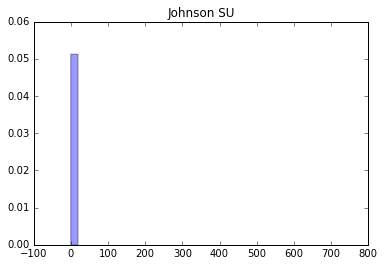

In [678]:
import scipy.stats as st
import seaborn as sns

y = pd.DataFrame(train2.PoolArea)

plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

y.std()

In [701]:
train2.GrLivArea = np.log1p(train2.GrLivArea)
train2.MasVnrArea = np.log1p(train2.MasVnrArea)
train2.TotalBsmtSF = np.log1p(train2.TotalBsmtSF)
train2.LotFrontage = np.log1p(train2.LotFrontage)
train2.LotArea = np.log1p(train2.LotArea)
train2.SalePrice = np.log1p(train2.SalePrice)
#train2.MiscVal = np.log1p(train2.MiscVal)
#train2.BsmtFinSF1 = np.log1p(train2.BsmtFinSF1)
#train2.BsmtHalfBath = np.log1p(train2.BsmtHalfBath)
#train2.BsmtFinSF2 = np.log1p(train2.BsmtFinSF2)
#train2['1stFlrSF'] = np.log1p(train2['1stFlrSF'])
#train2.OpenPorchSF = np.log1p(train2.OpenPorchSF)
#train2.WoodDeckSF = np.log1p(train2.WoodDeckSF)
#train2.BsmtHalfBath = np.log1p(train2.BsmtHalfBath)

In [702]:
quant_feats = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
              'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
              'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','SalePrice','YearBuilt','YearRemodAdd']

qual_feats = [item for item in train2.columns if item not in quant_feats]

In [703]:
train2[qual_feats] = train2[qual_feats].astype(object)

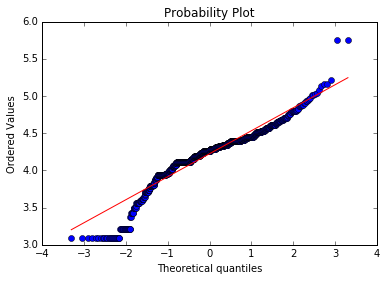

In [704]:
import numpy as np 
import pylab 
import scipy.stats as stats
  
stats.probplot(train2.LotFrontage, dist="norm", plot=pylab)
pylab.show()

## Dummyfying the Data

In [706]:
df = train2.copy()

In [707]:
qual_dummies = pd.get_dummies(df[qual_feats], drop_first = True)

In [708]:
#qual_dummies.shape
dummy_train = pd.concat([train2[quant_feats],qual_dummies],axis = 1)

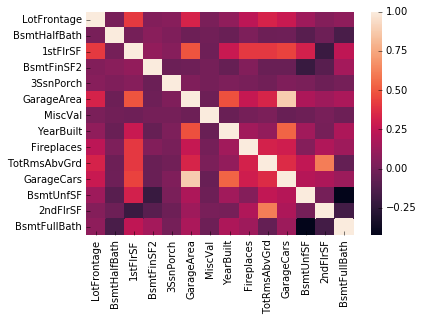

In [686]:
sns.heatmap(train2[quant].sample(15, axis=1).corr())

In [709]:
#dummy_train.iloc[[1298]]
dummy_train.drop(dummy_train.index[1298], inplace = True)
dummy_train.drop(dummy_train.index[523], inplace = True)
dummy_train.drop(dummy_train.index[1182], inplace = True)

In [710]:
list(dummy_train.shape)

[1457, 397]

## Regression

In [711]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [712]:
y = dummy_train.SalePrice
X = dummy_train.loc[:, dummy_train.columns != 'SalePrice']

In [713]:
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size = 0.25,random_state=0)

In [714]:
kag_reg = LinearRegression()

In [715]:
kag_reg.fit(train_X,train_y, sample_weight=None)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [716]:
kag_reg.predict(val_X)

array([ 11.80388098,  12.09058497,  11.52262086,  11.80778303,
        12.67907499,  11.88468175,  12.05646217,  11.76956538,
        11.86048751,  12.47338825,  12.02688845,  12.26130533,
        12.11078017,  11.89383406,  11.30175105,  11.925358  ,
        12.20823219,  11.3620985 ,  12.02200284,  13.06215624,
        12.55253996,  11.99333785,  12.62985055,  11.60083162,
        11.69876533,  11.77220618,  11.70846997,  11.25243261,
        11.89175414,  12.60763157,  11.9924625 ,  12.35185074,
        12.29063779,  12.17143393,  13.01059937,  11.92905909,
        11.8010004 ,  12.11266355,  11.90617691,  11.56045016,
        11.74687568,  12.20822338,  12.50311476,  11.63879954,
        12.32355072,  11.75287874,  12.53867954,  11.80267627,
        11.67289306,  12.42801173,  12.47938687,  11.52177607,
        11.57518904,  11.88547946,  12.91025074,  12.41482935,
        12.56578595,  11.73153168,  12.09180679,  11.84813415,
        11.70708846,  11.76434546,  11.58213642,  11.85

In [717]:
kag_reg.score(val_X,val_y)

0.87805116970306585

## Ridge and Lasso

In [718]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [719]:
ridge_reg = RidgeCV(cv=12)

ridge_reg.fit(train_X, train_y)

ridge_reg.predict(val_X)

ridge_reg.score(val_X, val_y)

0.93250675091609359

In [694]:
ridge_reg

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=12, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [720]:
lasso_reg = LassoCV(cv=10)

lasso_reg.fit(train_X, train_y)

lasso_reg.predict(val_X)

lasso_reg.score(val_X, val_y)

0.87874351654046401